## Задача кластеризации (k-means).

In [57]:
import numpy as np
from numpy.linalg import norm
import random
import copy
import matplotlib.pyplot as plt

In [58]:
def find_distance(x, centers, metric):
    distance = 0
    if metric == "euclid":
        for q in range(2):
            distance += (x[q]-centers[q])**2
        return distance**(1/2)
    else:
        for q in range(2):
            distance += np.abs(centers[q]-x[q])
        return distance

In [59]:
def data_distribution(array, clusters, metrics, k): 
    cluster_content = [[] for i in range(k)]
    n = len(array)
    for i in range(n):
        min_distance = float('inf')
        situable_cluster = -1
        for j in range(k):
            distance = find_distance(array[i], clusters[j], metrics)
            if distance < min_distance:
                min_distance = distance
                situable_cluster = j

        cluster_content[situable_cluster].append(array[i])
    return cluster_content

In [60]:
def cluster_update(clusters, cluster_content):
    k = len(clusters)
    for i in range(k):
        for q in range(2):
            updated_parameter = 0
            for j in range(len(cluster_content[i])): 
                updated_parameter += cluster_content[i][j][q]
            if len(cluster_content[i]) != 0:
                updated_parameter = updated_parameter / len(cluster_content[i])
            clusters[i][q] = updated_parameter
    return clusters

In [61]:
def initial_centers(k, method="random"):
    centers = [[0, 0] for q in range(k)]
    if method == "random":
        for i in range(k):
            for q in range(2):
                centers[i][q] = random.randint(0, 100)
    else:
        centers[0] = [0, 0]
        centers[1] = [100, 100]
        centers[2] = [100, 0]
        centers[3] = [50, 0]
        centers[4] = [0, 100]
    return centers

In [62]:
def clusterization(array, k, metrics, method):
    n = len(array)   
    iters = 1
    centers = initial_centers(k, method)
    cluster_content = [[] for i in range(k)] 

    cluster_content = data_distribution(array, centers, metrics, k)

    privious_cluster = copy.deepcopy(centers)
    while 1:
        centers = cluster_update(centers, cluster_content)
        cluster_content = data_distribution(array, centers, metrics, k)
        iters += 1
        if centers == privious_cluster:
            return cluster_content, centers, iters
        privious_cluster = copy.deepcopy(centers)

In [63]:
def visualisation_2d(cluster_content, centers, iters, metrics, method):
    k = len(cluster_content)
    plt.grid() 
    plt.xlabel("x")    
    plt.ylabel("y")

    for i in range(k): 
        x_coordinates = []
        y_coordinates = []
        for q in range(len(cluster_content[i])):
            x_coordinates.append(cluster_content[i][q][0])
            y_coordinates.append(cluster_content[i][q][1])
        plt.scatter(x_coordinates, y_coordinates)
        plt.scatter(centers[i][0],centers[i][1],c="red",s=60, marker="D")
        plt.title("Metrics = {}, method = {}, iters = {}".format(metrics, method, iters))
    plt.show()

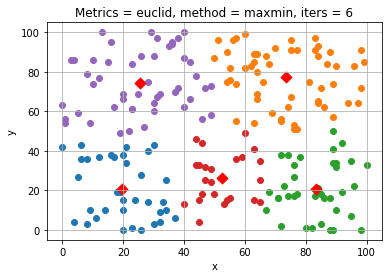

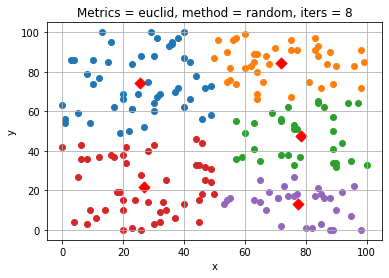

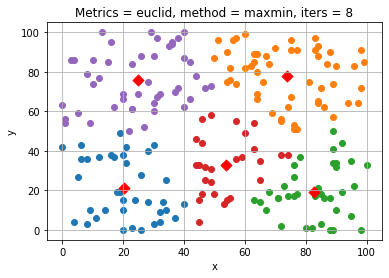

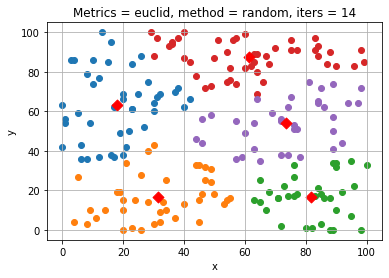

In [64]:
n = 200
k = 5

points = [[0, 0] for q in range(n)] 

for i in range(n):
        for q in range(2):
            points[i][q] = random.randint(0, 100)

cluster_content, centers, iters = clusterization(points, k, "euclid", "maxmin")
visualisation_2d(cluster_content, centers, iters, "euclid", "maxmin")

cluster_content, centers, iters = clusterization(points, k, "euclid", "random")
visualisation_2d(cluster_content, centers, iters, "euclid", "random")

cluster_content, centers, iters = clusterization(points, k, "manhattan", "maxmin")
visualisation_2d(cluster_content, centers, iters, "euclid", "maxmin")

cluster_content, centers, iters = clusterization(points, k, "manhattan", "random")
visualisation_2d(cluster_content, centers, iters, "euclid", "random")